In [7]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
insurance_data=pd.read_csv("insurance.csv")

In [19]:



X=insurance_data.drop(columns=["charges"])
Y=insurance_data["charges"]

X=pd.get_dummies(X,columns=["region"],drop_first=True,dtype=int)

X["sex"]=X["sex"].map({"female":1,"male":0})
X["smoker"]=X["smoker"].map({"yes":1,"no":0})

X["age_smoker"]=X["age"]*X["smoker"]
X["bmi_smoker"]=X["bmi"]*X["smoker"]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

MSE: 20922599.87103596
MSE: 20920214.075041078
MSE: 20917870.72408646
MSE: 20921006.729136664
MSE: 20922551.460643258
MSE: 20878416.543871917
MSE: 22423172.68602325
MSE: 21046489.293890778
MSE: 21812072.994225923


<Axes: >

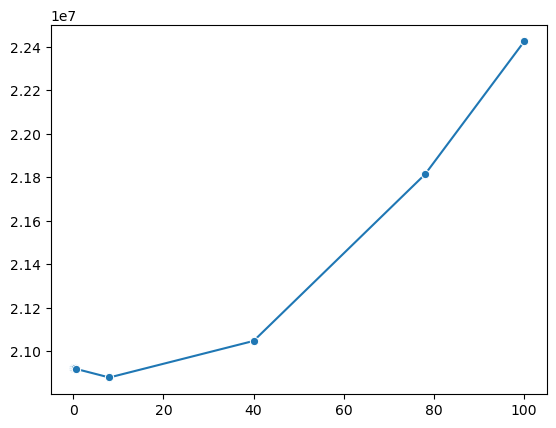

In [34]:
import seaborn as sns
alphas=[0.001,0.3,0.6,0.2,0.007,8,100,40,78]
mses=[]
for a in alphas:
    lasso_model=linear_model.Lasso(alpha=a)
    lasso_model.fit(X_train,Y_train)

    y_pred=lasso_model.predict(X_test)
    mse=mean_squared_error(Y_test, y_pred)
    print("MSE:",mse)
    mses.append(mse)
sns.lineplot(x=alphas,y=mses,marker="o")

In [41]:
from sklearn.linear_model import LassoCV

alpha=[0.001,0.3,0.6,0.2,0.007,8,100,40,78]

lasso_cv_model=LassoCV(
    alphas=alpha,
    cv=5,
    max_iter=1000,
    random_state=42   
)

lasso_cv_model.fit(X_train,Y_train)
print(lasso_cv_model.alpha_)


0.001


In [43]:
y_pred=lasso_cv_model.predict(X_test)
mse=mean_squared_error(Y_test, y_pred)
print(mse)

20922599.87103596
